### Linear regression

Consider an D-dimensional input variable $\boldsymbol{x} = \begin{bmatrix} x_1 & x_2 & \dots & x_D \end{bmatrix}^\top$ and a scalar output variable $y$. The input-output relation between $\boldsymbol{x}$ and $y$ is unknwon. 

Given a training dataset with $N$ observations $\{\boldsymbol{x}_n, y_n\}$, where $n = 1, \dots, N$, the goal is to predict $y$ for a new $\boldsymbol{x}$.     

The linear regression method uses a linear combination of $(x_1, \dots, x_D )$,  
$$ f(\boldsymbol{x}, \boldsymbol{w}) = w_0 + w_1x_1 + w_2x_2 + \dots + w_Dx_D = \boldsymbol{w}^\top\boldsymbol{x},$$
or a linear combination of basis functions $(\phi_1(\boldsymbol{x}), \dots, \phi_M(\boldsymbol{x}))$ 
$$ f(\boldsymbol{x}, \boldsymbol{w}) = w_0 + w_1\phi_1(\boldsymbol{x}) + w_2\phi_2(\boldsymbol{x}) + \dots + w_M\phi_M(\boldsymbol{x}) = \boldsymbol{w}^\top\boldsymbol{\phi}(\boldsymbol{x}).$$




### Maximum likelihood and least squares

In the notebook 01 we have derived the least sqaure solution of linear regression: 
$$ \boldsymbol{w}^* = (\boldsymbol{\Phi}^\top\boldsymbol{\Phi})^{-1}\boldsymbol{\Phi}^\top\boldsymbol{y}$$

Now we will approach this problem using the maximum likelihood method. 

To use the maximum likelihood method, we need to **assume** a probabilistic model between the input $\boldsymbol{x}$ and the target output $y$. For example, a linear Gaussian model: 
$$y = \boldsymbol{w}^\top\boldsymbol{\phi}(\boldsymbol{x}) + \epsilon,$$
where $\epsilon \sim \mathcal{N}(0, \sigma^2)$ is the additive Gaussian noise.  

The likelihood function, which describes the probability of observing $\{y_n\}$ given $\{\boldsymbol{x}_n\}$ ($n = 1, \dots, N$), is a function of parameters $\boldsymbol{x}$ and $\sigma$: 
$$p(\boldsymbol{y}\ |\ \boldsymbol{X}, \boldsymbol{w}, \sigma) = \prod_{n=1}^{N} \mathcal{N}(y_n\ |\ \boldsymbol{w}^\top\boldsymbol{\phi}(\boldsymbol{x}_n), \sigma^2) = \prod_{n=1}^{N} \frac{1}{\sqrt{2\pi \sigma^2}}\exp\{ -\frac{[y_n - \boldsymbol{w}^\top\boldsymbol{\phi}(\boldsymbol{x}_n)]^2}{2\sigma^2} \}.$$

The log-likelihood is often used for its simplicity: 
$$\ln p(\boldsymbol{y}\ |\ \boldsymbol{X}, \boldsymbol{w}, \sigma) = -\frac{N}{2}\ln2\pi\sigma^2 - \frac{1}{2\sigma^2}\sum_{n=1}^N [y_n - \boldsymbol{w}^\top\boldsymbol{\phi}(\boldsymbol{x}_n)]^2$$

At this point, it is straightforward to see that the $\boldsymbol{w}$ maximize the likelihood function is equivalent to the $\boldsymbol{w}$ minimize $\sum_{n=1}^N [y_n - \boldsymbol{w}^\top\boldsymbol{\phi}(\boldsymbol{x}_n)]^2$, which leads to the same result as the least square solution. 

**Note**: Maximum likelihood $\neq$ least square. 
1. The maximum likelihood method assumes a linear Gaussian model between the input and output variables, while the least square makes no such assumption. 
2. It is a special case in the linear Gaussian case, the maximum likelihood method gives the same results as the least square method. 

### Regularized least square

The regularized least square method can be presented in the following optimization problem: 
$$ \min_{\boldsymbol{w}}\ || \boldsymbol{y} - \boldsymbol{w}^\top\boldsymbol{\Phi} ||^2 + \lambda ||\boldsymbol{w}||_q $$
where 
$$||\boldsymbol{w}||_q = (\sum_{m=1}^M |w_m|^q)^{\frac{1}{q}}$$
and $\lambda$ is the regularization coefficient.  

#### LASSO regression ($\ell_1$-norm regularization)

The LASSO regression has the following form: 
$$ \min_{\boldsymbol{w}}\ \sum_{n=1}^N [\boldsymbol{y} - \boldsymbol{w}^\top\boldsymbol{\phi}(\boldsymbol{x}_n) ]^2 + \lambda \sum_{m=1}^M |w_m| $$
or 
$$ \min_{\boldsymbol{w}}\ || \boldsymbol{y} - \boldsymbol{\Phi}\boldsymbol{w} ||^2 + \lambda ||\boldsymbol{w}|| $$
The LASSO regression does not have analytic solutions and need to be solved computationally (see Problem 6.11 and Section "$\ell_1$-norm regularization" in the book Convext Optimization). 

#### Ridge regression (squared Euclidean norm, also known as Tikhonov regularization)

The Ridge regression has the following form: 
$$ \min_{\boldsymbol{w}}\ || \boldsymbol{y} - \boldsymbol{\Phi}\boldsymbol{w} ||^2 + \lambda ||\boldsymbol{w}||^2 $$
which has the analytical solution
$$\boldsymbol{w}^* = (\lambda\boldsymbol{I} + \boldsymbol{\Phi}^\top\boldsymbol{\Phi})^{-1}\boldsymbol{\Phi}^\top\boldsymbol{y}.$$

In [11]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [12]:
X = np.random.uniform(0, 1, (10,2))
w = np.array([5, 5])
y = X.dot(w) + np.random.normal(0, .1, (10))
y = y.reshape((10, 1))

In [13]:
# Unregularized least square
w_ols = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(y)
print(f"The ordinary least square solution is: {w_ols}")

The ordinary least square solution is: [[5.05389066]
 [4.92053095]]


In [14]:
def costfunction(X,y,theta):
    '''OLS cost function'''
    #Initialisation of useful values 
    m = np.size(y)
    
    #Cost function in vectorized form
    h = X @ theta
    J = float((1./(2*m)) * (h - y).T @ (h - y));    
    return J;

def cost_l2(x,y):
    '''L2 cost functiom'''
    return x**2 + y**2

def cost_l1(x,y):
    '''L1 cost function'''
    return np.abs(x) + np.abs(y)

In [15]:
# LASSO regression with CVXPY
def loss_fn(X, Y, w):
    return cp.norm2(X@w - Y)**2

def regularizer_l1(w):
    return cp.norm1(w)

def objective_fn_lasso(X, Y, w, lambd):
    return loss_fn(X, Y, w) + lambd * regularizer_l1(w)

w_lasso = cp.Variable(shape=(2,1))
lambd = cp.Parameter(nonneg=True)
problem = cp.Problem(cp.Minimize(objective_fn_lasso(X, y, w_lasso, lambd)))


lambda_range = np.logspace(0,10,num = 100)/1000
theta_0_list_reg_l1 = []
theta_1_list_reg_l1 = []

for l in lambda_range:
    lambd.value = l
    problem.solve()
    t0, t1 = w_lasso.value
    theta_0_list_reg_l1.append(t0)
    theta_1_list_reg_l1.append(t1)

#lambd.value = 0.1
#problem.solve()

#print(f"The LASSO regression solution is: {w_lasso.value}")

In [16]:
# Ridge regression with CVXPY
def loss_fn(X, Y, w):
    return cp.norm2(X@w - Y)**2

def regularizer_l2(w):
    return cp.norm2(w)

def objective_fn_ridge(X, Y, w, lambd):
    return loss_fn(X, Y, w) + lambd * regularizer_l2(w)

w_ridge = cp.Variable(shape=(2,1))
lambd = cp.Parameter(nonneg=True)
problem = cp.Problem(cp.Minimize(objective_fn_ridge(X, y, w_ridge, lambd)))

lambda_range = np.logspace(0,10,num = 100)/1000
theta_0_list_reg_l2 = []
theta_1_list_reg_l2 = []

for l in lambda_range:
    lambd.value = l
    problem.solve()
    t0, t1 = w_ridge.value
    theta_0_list_reg_l2.append(t0)
    theta_1_list_reg_l2.append(t1)

/var/folders/yg/zn5vv2gx6xz81ll2ccf10y_m0000gn/T/ipykernel_960/3166368680.py:25: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z_l1, levels = [.1, 1, 2, 3, 4, 5, 6],  cmap = 'binary', label = 'l1')
/var/folders/yg/zn5vv2gx6xz81ll2ccf10y_m0000gn/T/ipykernel_960/3166368680.py:26: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z_ls, levels = [.1,.2,.3,.4,.5], cmap = 'coolwarm', label = 'least squares')
/var/folders/yg/zn5vv2gx6xz81ll2ccf10y_m0000gn/T/ipykernel_960/3166368680.py:55: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z_l2, levels = [.1, 5, 10, 15, 20, 25],  cmap = 'binary', label = 'l_2')
/var/folders/yg/zn5vv2gx6xz81ll2ccf10y_m0000gn/T/ipykernel_960/3166368680.py:56: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z_ls, levels = [.1,.2,.3,.4,.5], cmap = 'coolwarm', label = 'least squares')


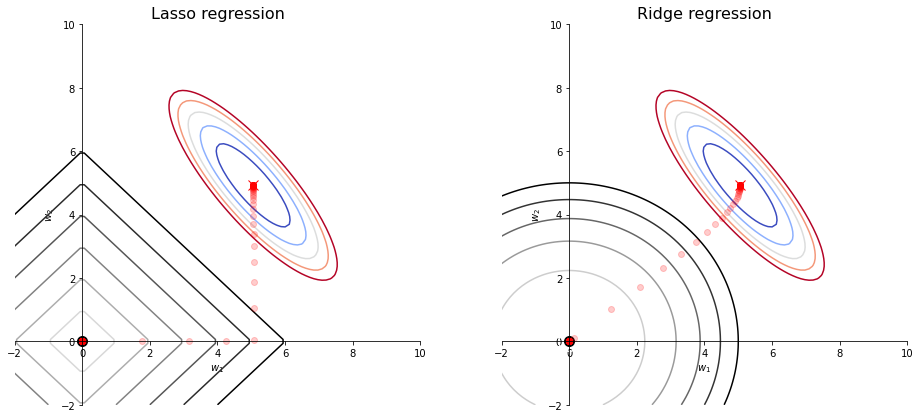

In [36]:
#Setup of meshgrid of theta values
xx, yy = np.meshgrid(np.linspace(-2,10,100),np.linspace(-2,10,100))

#Computing the cost function for each theta combination
zz_l2 = np.array(  [cost_l2(xi, yi )for xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] ) #L2 function

zz_l1 = np.array(  [cost_l1(xi, yi )for xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] ) #L1 function

zz_ls = np.array(  [costfunction(X, y.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(xx), np.ravel(yy)) ] ) #least square cost function

#Reshaping the cost values    
Z_l2 = zz_l2.reshape(xx.shape)
Z_ls = zz_ls.reshape(xx.shape)
Z_l1 = zz_l1.reshape(xx.shape)

#Defining the global min of each function
min_ls = np.linalg.inv(X.T@X)@X.T@y
min_l2 = np.array([0.,0.])
min_l1 = np.array([0.,0.])

#Plotting the contours - L1
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)
ax.contour(xx, yy, Z_l1, levels = [.1, 1, 2, 3, 4, 5, 6],  cmap = 'binary', label = 'l1')
ax.contour(xx, yy, Z_ls, levels = [.1,.2,.3,.4,.5], cmap = 'coolwarm', label = 'least squares')
ax.set_xlabel(r'$w_1$')
ax.set_ylabel(r'$w_2$')
ax.set_title('Lasso regression', fontsize=16)

# set the x-spine
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

#Plotting the minimum - L1
ax.plot(min_ls[0],min_ls[1], marker = 'x', color = 'red', markersize = 10)
ax.plot(0,0, marker = 'o', color = 'black', markersize = 10)

#Plotting the path of L2 regularized minimum
ax.plot(theta_0_list_reg_l1,theta_1_list_reg_l1, linestyle = 'none', marker = 'o', color = 'red', alpha = .2)


#Plotting the contours - L2
ax = fig.add_subplot(1, 2, 2)
ax.contour(xx, yy, Z_l2, levels = [.1, 5, 10, 15, 20, 25],  cmap = 'binary', label = 'l_2')
ax.contour(xx, yy, Z_ls, levels = [.1,.2,.3,.4,.5], cmap = 'coolwarm', label = 'least squares')
ax.set_xlabel(r'$w_1$')
ax.set_ylabel(r'$w_2$')
ax.set_title('Ridge regression', fontsize=16)

# set the x-spine
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

#Plotting the minimum - L2
ax.plot(min_ls[0],min_ls[1], marker = 'x', color = 'red', markersize = 10)
ax.plot(0,0, marker = 'o', color = 'black', markersize = 10)

#Plotting the path of L2 regularized minimum
ax.plot(theta_0_list_reg_l2,theta_1_list_reg_l2, linestyle = 'none', marker = 'o', color = 'red', alpha = .2)

plt.show()